# $f(x,y) = x^2y$

In [8]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt

$F = (2xy,x^2)$
$F_{\alpha} = (\frac{2xy+2\alpha x^3}{1+4\alpha^2x^2} ,\frac{-x^2+4\alpha x^2y}{1+4\alpha^2x^2})$

$\nabla F =
\left(\begin{array}
22y & 2x\\
-2x & 0
\end{array}\right)
$

$\nabla F_{\alpha} =
\left(\begin{array}
2\frac{2(4\alpha^3x^4+3\alpha x^2-4\alpha^2x^2y+y)}{(1+4\alpha^2x^2)^2} & \frac{2x}{4\alpha^2x^2+1}\\
-\frac{2x(4\alpha y-1)}{(1+4\alpha^2x^2)^2} & -\frac{4\alpha x^2}{4\alpha^2x^2+1}
\end{array}\right)
$



In [25]:
def oracle_1(x,y,a):
    gx = 2*x*y
    gy = x*x
    gxy = 2*x
    gax = (gx+a*gxy*gy)/(1+(gxy**2)*a**2)
    gay = (-gy+a*gxy*gx)/(1+(gxy**2)*a**2)
    return([gax,gay])

def oracle_2(x,y,a):
    gxx = 2*(4*a**3*x**4+3*a*x**2-4*a**2*x**2*y+y)/(1+4*a**2*x**2)**2
    gxy = 2*x/(4*a**2*x**2+1)**2
    gyx = 2*x*(4*a*y-1)/(1+4*a**2*x**2)
    gyy = 4*a*x**2/(4*a**2*x**2+1)
    nabla_F = np.zeros((2,2))
    nabla_F[0][0] = gxx
    nabla_F[0][1] = gxy
    nabla_F[1][0] = -gyx
    nabla_F[1][1] = -gyy

    return(nabla_F)

In [26]:
#initialize iterates
x_init,y_init = 0.5,0.5

def iteration(x,y,delta,a):
    #set parameters
    l = 0
#     delta = 0.1

    norm_F = np.linalg.norm(oracle_1(x_init,y_init,a))
    u = norm_F/delta

    nu = delta*u**2/norm_F

    lambd = (l+u)/2
    lambda_m = lambd-nu

    #prepare loop
    A_1 = oracle_2(x,y,a)
    A_1[0][0] += lambd
    A_1[1][1] += lambd
    
    A_2 = oracle_2(x,y,a)
    A_2[0][0] += lambda_m
    A_2[1][1] += lambda_m
    
    temp_1 = np.linalg.norm(np.linalg.solve(A_1,oracle_1(x_init,y_init,a)))
    temp_2 = np.linalg.norm(np.linalg.solve(A_2,oracle_1(x_init,y_init,a)))


    while (not temp_1 <= lambd) and (temp_2> lambda_m):
        if lambd <= delta*u**2/norm_F:
            
            break
        if temp_1 <= lambd:
            u = lambd
            lambd = (l+u)/2
            lambda_m = lambd-nu
        else:
            l = lambd
            lambd = (l+u)/2
            lambda_m = lambd-nu
            A_1 = oracle_2(x,y)
            A_1[0][0] += lambd
            A_1[1][1] += lambd
    return([x,y]-np.linalg.solve(A_1,oracle_1(x_init,y_init,a)))

#                                                               $\tau$

\begin{equation}\label{eq:tau-def}
    \tau_p(z_{k+\frac{1}{2}},z_k) :=  \sum_{i=0}^p \nabla^i F(z_k)[z_{k+\frac{1}{2}}-z_k]^i
\end{equation}

$\Phi$

\begin{equation}\label{eq:phi-def}
    \Phi_p(z_{k+\frac{1}{2}},z_k) :=   \tau_{p-1}(z_{k+\frac{1}{2}},z_k) +\frac{2L_p}{p!}\|z_{k+\frac{1}{2}}-z_k\|^{p-1}(z_{k+\frac{1}{2}}-z_k) ,
\end{equation}

## Algorithm

\begin{equation}\label{alg:higher1}\tag{HOMVI}
\begin{gathered}
    z_{k+\frac{1}{2}} = z' : \Phi(z',z_k)=0\\
    \lambda_k = \frac{1}{2}\|z_{k+\frac{1}{2}} - z_k\|^{1-p}
    \\
    z_{k+1} = argmin_{z'' \in R^d} \Big\{ <{F(z_{k+\frac{1}{2}}), z'' - z_{k+\frac{1}{2}}}> + \frac{L_p}{p!\lambda_k}\|z_{k}'' - z_k\|^2\Big\} = z_k - \frac{p!\lambda_k}{L_p} F(z_{k+\frac{1}{2}})\\
    Return~z_{k+\frac{1}{2}}
\end{gathered}    
\end{equation}

For p=2: $$z_{k+\frac{1}{2}} = z' : F(z_k)+\nabla F(z_k)(z_{k+\frac{1}{2}}-z_k)+2\frac{L_p}{p!}\|z_{k+\frac{1}{2}}-z_k\|(z_{k+\frac{1}{2}}-z_k)=0$$



In [61]:
def HO_MVI(x_init,y_init,N,delta,L,a):
    x,y = x_init,y_init
    operator = []
    iterates_x = [x]
    iterates_y = [y]
    iterates_x_half = []
    iterates_y_half = []    
    for i in range(N):
        
        x_half,y_half = iteration(x,y,delta,a)
#         print(x_half,y_half)
        lambda_k = 1/2*((x_half-x)**2+(y_half-y)**2)**(-0.5)
#         print(lambda_k)
        (x,y) = np.array((x,y))-2*lambda_k/L*np.array(oracle_1(x_half,y_half,a))
        
        iterates_x.append(x)
        iterates_y.append(y)
        
        iterates_x_half.append(x_half)
        iterates_y_half.append(y_half)  
        operator.append(np.linalg.norm(oracle_1(x_half,y_half,a)))
#         print(np.linalg.norm(oracle_1(x_half,y_half)))
    return([iterates_x_half,iterates_y_half,iterates_x,iterates_y,operator])
#     return(operator)

In [119]:
def first_MVI(x_init,y_init,N,L,a):
    x = x_init
    y = y_init
    Fs = []
    xs = []
    ys = []
    for i in range(N):
        
        [gx,gy] = oracle_1(x,y,a)
        
        x_temp = x-1/(2*L)*gx
        y_temp = y-1/(2*L)*gy

        [gx,gy] = oracle_1(x_temp,y_temp,a)
        
        x = x-1/(2*L)*gx
        y = y-1/(2*L)*gy

        Fs.append(np.linalg.norm(oracle_1(x,y,a)))
        xs.append(x)
        ys.append(y)
    return((x,y),Fs,xs,ys)
    

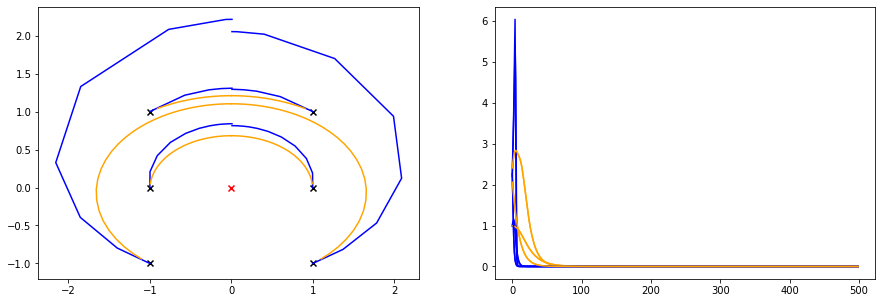

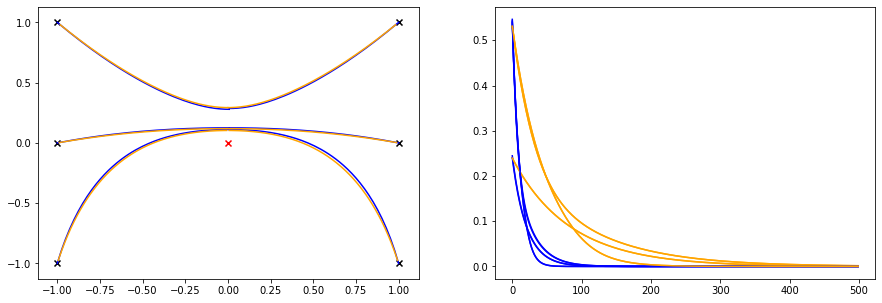

In [191]:
for a in [0,2]:
    f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

    for j in range(-1,2):
        for k in range(-1,2):
            if j==0:
                break
            ax1.scatter(j,k,marker='x', color = 'black')

            iterates = (HO_MVI(j,k,500,0.005,500,a))
            ax1.plot(iterates[2],iterates[3],color = 'blue')
            ax2.plot((iterates[-1]),color = 'blue')
            

            
            iterates = (first_MVI(j,k,500,10,a))
            ax1.plot(iterates[2],iterates[3],color = 'orange')
            ax2.plot((iterates[1]),color = 'orange')
#             ax2.plot(0.6/np.arange(1,50)**2,color = 'green')

            
    ax1.scatter(0,0,marker='x',color = 'red')
# plt.scatter(-1,0,marker='x')